<center><h1>Mineria de Datos</header1></center>

Presentado por: Verònica Rodrìguez - Grupo 7 <br>
Lider: Byron Landeta <br>
Fecha: 16/08/2022

# Importación de librerias necesarias

In [74]:
'''Importar librerìa para el tratamiento de datos'''
import pandas as pd
'''Importar librerìas sklearn'''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
'''Importar librerías para crear la matriz de confusión.'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
'''Importar librerias necesarias para graficar el árbol de decision.'''
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

## Cargar el Dataset

In [28]:
'''Cargar el dataset desde GiHtHub'''
df= pd.read_csv('https://raw.githubusercontent.com/leslypisco/datasets/main/bank-additional-full.csv',sep=(';'))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Descripción de la fuente del Dataset


Los datos están relacionados con campañas de ventas directo que estan hechas por medio de llamadas telefónicas, de una entidad bancaria perteneciente a Portugal. El objetivo de esta DataSet, realizando el modelo queremos llegar a predecir si el cliente suscribirá un prestamo bancario (variable y).

## Explique el problema a resolver. 
Se tiene una fuente de datos de las campañas de marketing que realiza un Banco por medio de llamadas telefònicas. En el presente dataset se tienen x características () como variables de entrada y una columna que contiene la variable objetivo denominada "y" que alberga un tipo binario descrito como si(1) y no(0), para saber si el cliente fue suscrito a un depòsito de largo plazo. En este caso, utilizando algunos datos del cliente y los datos de del contacto se va a crear, entrenar y evaluar un modelo de àrbol de decisiòn para predecir si, despuès de realizar la campaña de marketing, el cliente se suscribirà o no a un depòsito a plazo.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [29]:
'''Nùmero de instancias en total'''
print("Número de instancias:\n", df.shape)

Número de instancias:
 (41188, 21)


In [30]:
'''Nùmero de atributos de entrada'''
print("Nùmero de atributos de entrada:\n", df.drop('y',axis=1).columns.shape)
print("Atributos de entrada:\n", df.drop('y',axis=1).columns)

Nùmero de atributos de entrada:
 (20,)
Atributos de entrada:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [31]:
'''Estadìsticas de la variable objetivo'''
print("Estadìsticas de la variable objetivo:\n", df['y'].unique())

Estadìsticas de la variable objetivo:
 ['no' 'yes']


In [32]:
'''Estadìsticas de los atributos en relaciòn con la variable objetivo'''
print("Estadìsticas de los atributos en relaciòn con la variable objetivo:\n", df.drop('y',axis=1).describe())

Estadìsticas de los atributos en relaciòn con la variable objetivo:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291  

In [33]:
'''Verificar si el conjunto de datos contiene datos nulos'''
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

En la caracterización de nuestra dataset se obtuvo un total de 48188 registros de datos con 21 características por ende nos indica el numero de filas y columnas de nuestra dataset. En consecuencia se establece un drop para tener solo los 20 valores de entrada donde se establecerá las variables X y Y. las características de las variables objetivo nos muestra si y no, que son los valores que sé si el cliente fue suscrito a un depósito de largo plazo. Finalmente mostramos estadísticas de los atributos en relación con la variable objetivo

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [40]:
'''Definir la variable independiente (X) que corresponde a las características del modelo.'''
X = df.drop('y',axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [41]:
'''Definir la variable dependiente (y) o la etiqueta del modelo.'''
y = df['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [39]:
'''Tranformaciòn de la variable objetivo'''
le=preprocessing.LabelEncoder()
yTransformada=le.fit_transform(y)
yTransformada

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
'''Transformaciòn de las caracterìsticas'''
Xjob = le.fit_transform(X.job)
Xmarital = le.fit_transform(X.marital)
Xeducation = le.fit_transform(X.education)
Xdefault = le.fit_transform(X.default)
Xhousing = le.fit_transform(X.housing)
Xday_of_week = le.fit_transform(X.day_of_week)
Xduration = le.fit_transform(X.duration)

In [50]:
'''Transformaciòn de las caracterìsticas del dataframe'''
Xdf = pd.DataFrame()
Xdf['job'] = Xjob
Xdf['marital'] = Xmarital
Xdf['education'] = Xeducation
Xdf['default'] = Xdefault
Xdf['housing'] = Xhousing
Xdf['day_of_week'] = Xday_of_week
Xdf['duration'] = Xduration
Xdf['pdays']=df.pdays
Xdf['previous']=df.previous
Xdf['emp.var.rate']=df['emp.var.rate']
Xdf['cons.price.idx']=df['cons.price.idx']
Xdf['cons.conf.idx']=df['cons.conf.idx']
Xdf['euribor3m']=df['euribor3m']
Xdf['nr.employed']=df['nr.employed']
Xdf['previous']=df.previous

In [ ]:
df['job']=df['AgencyId'].replace('CA','1')

In [51]:
'''Imprimir caracterìsticas'''
Xdf

,job,marital,education,default,housing,day_of_week,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,1,261,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,1,0,1,149,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,2,1,226,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,1,151,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,1,307,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,334,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,1,1,5,0,0,0,383,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,5,1,6,0,2,0,189,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,9,1,5,0,0,0,442,999,0,-1.1,94.767,-50.8,1.028,4963.6


## División del dataset en datos de entrenamiento y datos de test 

In [55]:
'''Dividir el dataset en entrenamiento y en test
    70% para entrenar y 30% para las pruebas.'''
X_train, X_test, y_train, y_test = train_test_split(Xdf, yTransformada, test_size=0.3, random_state=1)

## Modelamiento

In [56]:
'''Crear el árbol de decisión.'''
clf = DecisionTreeClassifier()

In [57]:
'''Entrenar el árbol de decisión.'''
clf = clf.fit(X_train,y_train)

In [58]:
'''Predecir una respuesta a partir de los datos de prueba.'''
y_pred = clf.predict(X_test)

## Evaluación del Modelo

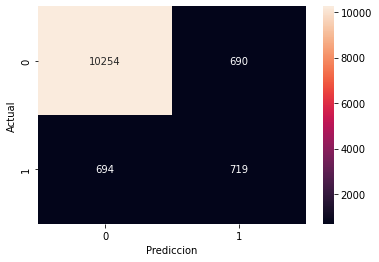

In [75]:
'''Crear y visualizar la matriz de confusión'''
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d")
plt.xlabel('Prediccion');
plt.ylabel('Actual');


A partir de los datos obtenidos de la evaluación del modelo, se tienen muestras en donde el número 0 supone una negativa a la suscripciòn del depòsito bancario, por su parte el número 1 es un positivo hacia la suscripciòn al depòsito bancario. En la matriz mostrada, se tiene que en la diagonal principal existe una predicción de 10254 valores que no fueron predichos correctamente. Por otro lado, un total de 719 datos fueron clasificados correctamente.

In [60]:
'''Evaluar el Accuracy del modelo.'''
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8879987051873433


In [61]:
'''Evaluar la precisión del modelo.'''
print("Precisión:\n ", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precisión:
  0.7234502064472532


In [62]:
'''Evaluar Recall del modelo.'''
print("Recall:\n ", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall:
  0.7228990902149216


En base a las métricas estudiadas anteriormente, se tiene un total del 0.88 de exactitud en el modelo, es decir, el modelo planteado acierta un 88% de las veces que evalua. También, el modelo cuenta con un 72% de precisión y un 72% de sensibilidad.

In [80]:
'''Definir caracterìsticas'''
features=['job','marital','education','education','default','housing','day_of_week','duration','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']

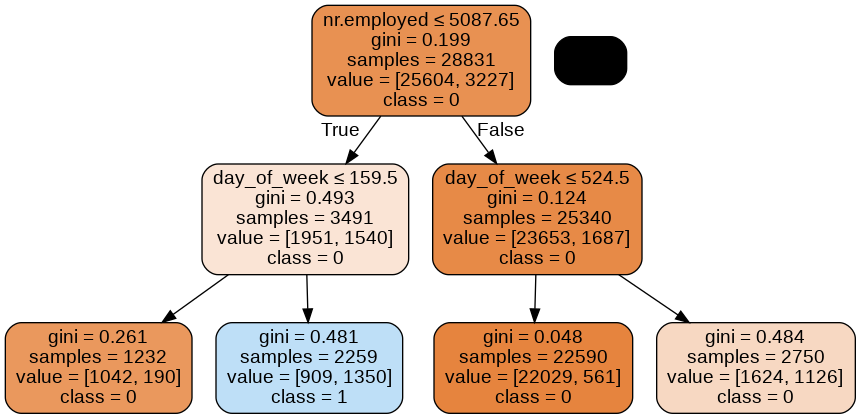

In [85]:
'''Creaciòn del àrbol de decision'''
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
              filled = True, rounded = True,
              special_characters = True,
              feature_names = features,
              class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arbol2.png')
Image(graph.create_png())

# Interpretación de Resultados

Para poder obtener la precisión aplicamos el modelo de árboles de decisión, utilizamos este modelo porque nos ayuda a obtener información acerca de las campañas de mercadotécnica bancaria. Nuestro modelo después de aplicar aprendizaje supervizado, Obtenemos los resultados de la evaluación del modelo, mediante Accuracy, Precision, y Recall

En donde tiene un acurracy de 88% y una precisión de 72.  Todo esto se realizó bajo la base de datos de
una entidad bancaria que tiene como objetivo predecir si es o no aceptado para
el préstamo o deposito bancario.